<a href="https://colab.research.google.com/github/patrick03524/Competitiva/blob/main/tangram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import time

In [3]:
#Definición de Limites
tablero_max = [[0,0],[0,120],[120,120],[120,0]]
x_max = 120
y_max = 120
#Definición de Figuras
figura1 = [[0,0],[0,120],[60,60]]
f1_xmax = 120
f2_ymax = 60

In [4]:
##Definición de la función que se encargará de aumentar
##los valores en el tangram

def increase():
    tangram.count += 1

In [5]:
##Definición de la Clase Tangram

class tangram:
    count = 0

    def __init__(self):
        self.name = 'xyz'
        self.salary = 4000

    def printCount(self):
        print(self.count * 10)

In [6]:
##Definición de Función para medir el tiempo

def medirTiempo():
    s1 = tangram()
    inicio = time.time()
    for i in range(0, 10, 1):
        s1.printCount()
        increase()
    final = time.time()
    print()
    print(f"He tardado {round(final - inicio, 10)} segundos.")

In [7]:
##Definición de la Clase Punto

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [8]:
##Definción de los métodos de la Clase Punto

def Left_index(points):
    minn = 0
    for i in range(1, len(points)):
        if points[i].x < points[minn].x:
            minn = i
        elif points[i].x == points[minn].x:
            if points[i].y > points[minn].y:
                minn = i
    return minn


def orientation(p, q, r):
    val = (q.y - p.y) * (r.x - q.x) - \
          (q.x - p.x) * (r.y - q.y)

    if val == 0:
        return 0
    elif val > 0:
        return 1
    else:
        return 2

In [9]:
##Definición del Convex Hull para el Tangram

def convexHull(points, n):
    if n < 3:
        return
    val_lef = Left_index(points)
    hull = []
    p = val_lef
    q = 0
    while True:
        hull.append(p)
        q = (p + 1) % n
        for i in range(n):
            if (orientation(points[p],
                            points[i], points[q]) == 2):
                q = i
        p = q
        if p == val_lef:
            break
    list_hull = []
    for each in hull:
        list_hull.append(Point(points[each].x, points[each].y))
        print(points[each].x, points[each].y)
    # print(list_hull)
    return list_hull

0 120
0 0
120 0
120 120



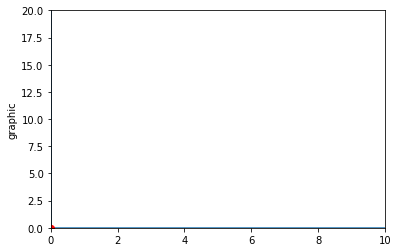

In [11]:
##Definición de los métodos y el main para hacer un plot del tangram

plt.rcParams['savefig.facecolor'] = "0.8"

def example_plot(ax, fontsize=12):
    ax.plot([1, 2])

    ax.locator_params(nbins=3)
    ax.set_xlabel('x-label', fontsize=fontsize)
    ax.set_ylabel('y-label', fontsize=fontsize)
    ax.set_title('Title', fontsize=fontsize)

if __name__ == '__main__':
    points_x = [0,0,120,120]
    points_y = [0,120,120,0]
    #points_x = []
    #points_y = []
    list_points = []
    for i in range(len(points_x)):
        list_points.append(Point(points_x[i], points_y[i]))
    list_hull = convexHull(list_points, len(list_points))
    # print(list_hull)
    hull_points_x = []
    hull_points_y = []
    print()
    for i in range(len(list_hull)):
        hull_points_x.append(list_hull[i].x)
        hull_points_y.append(list_hull[i].y)
    hull_points_x.append(list_hull[0].x)
    hull_points_y.append(list_hull[0].y)
    range_ax = [0, 10, 0, 20]
    plt.plot(hull_points_x, hull_points_y)
    plt.plot(points_x, points_y, 'ro')
    plt.axis(range_ax);
    plt.ylabel('graphic')
    plt.show()
